<a href="https://colab.research.google.com/github/mleyvaz/agrupamiento/blob/gh-pages/Copia_de_Metodolog%C3%ADa_de_la_Investigaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Fase 1: Exploracion de datos 

*   Calular medias de tendencia central
*   Calcular medidas de dispersión
*   Graficar





In [102]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


In [3]:
from sklearn import datasets
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [4]:

url = "https://github.com/mleyvaz/agrupamiento/blob/gh-pages/drogasXLS.xlsx?raw=true"
dataset = pd.read_excel(url)
dataset.head()



,id,2.1,2.2,2.3,2.4,3.1,3.2,3.3,3.4,4.1,4.2,4.3,4.4,5.1,5.2,5.3,6.1,6.2,6.3,6.4,6.5,6.6,6.7,7.1,7.2,7.3,7.4,7.5,7.6,7.7,7.8,7.9,7.10,7.11,7.12,7.13,7.14,7.15,7.16,7.17,7.18
0,1,2.0,1,0.0,NaN,3,0.0,0.0,2.0,0,1,1,1,1.0,0,1,2,0,0,NaN,0,0,1,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,2.0,1.0
1,2,2.0,1,0.0,NaN,5,1.0,1.0,NaN,1,1,0,0,0.0,0,1,2,1,1,0.0,0,0,1,1.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0
2,3,2.0,1,1.0,2.0,4,1.0,1.0,NaN,1,1,0,0,1.0,0,1,2,0,1,0.0,0,1,0,1.0,2.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0
3,4,2.0,1,0.0,NaN,5,1.0,1.0,NaN,1,0,0,0,0.0,0,0,2,0,1,0.0,0,0,0,1.0,4.0,4.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
4,5,4.0,2,0.0,NaN,5,0.0,1.0,NaN,1,1,1,0,0.0,0,0,2,1,1,0.0,0,1,0,1.0,2.0,2.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0


In [3]:
# Estadistica descriptiva
dataset.describe()

,id,2.1,2.2,2.3,2.4,3.1,3.2,3.3,3.4,4.1,4.2,4.3,4.4,5.1,5.2,5.3,6.1,6.2,6.3,6.4,6.5,6.6,6.7,7.1,7.2,7.3,7.4,7.5,7.6,7.7,7.8,7.9,7.10,7.11,7.12,7.13,7.14,7.15,7.16,7.17,7.18
count,3876.00000,3874.000000,3876.000000,3863.000000,335.000000,3876.000000,3874.000000,3875.000000,356.000000,3876.000000,3876.000000,3876.000000,3876.000000,3875.000000,3876.000000,3876.000000,3876.0,3876.000000,3876.000000,3334.000000,3876.000000,3876.000000,3876.000000,3873.000000,3869.000000,3873.000000,3873.00000,3872.000000,3873.000000,3873.000000,3875.000000,3874.000000,3874.000000,3874.000000,3874.000000,3874.000000,3874.000000,3874.000000,3874.000000,3874.000000,3874.000000
mean,1938.50000,2.618482,1.168215,0.086720,2.229851,4.809340,0.687403,0.877935,1.227528,0.082301,0.362229,0.712332,0.578947,0.221677,0.083333,0.516770,2.0,0.398865,0.860165,0.081284,0.174923,0.347781,0.439628,1.459076,2.313001,1.705655,1.26362,1.787190,1.075910,1.996643,1.038710,1.261745,1.710635,1.099897,1.289623,1.891585,1.511100,1.938307,1.656686,1.967992,1.778265
std,1119.04915,0.911543,0.374105,0.281461,0.839342,0.833818,0.463611,0.327403,0.542738,0.274859,0.480707,0.452734,0.493792,0.415429,0.276421,0.499783,0.0,0.489728,0.346860,0.273311,0.379950,0.476328,0.496406,1.505479,1.100432,1.245078,0.83904,0.409347,0.264888,1.599406,0.192927,0.439641,0.453526,0.299901,0.453646,0.310944,0.499941,0.240629,0.474877,0.176045,0.415467
min,1.00000,1.000000,1.000000,0.000000,1.000000,3.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,969.75000,2.000000,1.000000,0.000000,2.000000,5.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,1.000000,1.00000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000
50%,1938.50000,3.000000,1.000000,0.000000,2.000000,5.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,2.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,1.000000,1.00000,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
75%,2907.25000,3.000000,1.000000,0.000000,2.000000,5.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,2.0,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.00000,2.000000,1.000000,3.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,3876.00000,6.000000,2.000000,1.000000,4.000000,8.000000,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,7.000000,5.000000,5.00000,2.000000,2.000000,7.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


,id,2.1,2.2,2.3,2.4,3.1,3.2,3.3,3.4,4.1,4.2,4.3,4.4,5.1,5.2,5.3,6.1,6.2,6.3,6.4,6.5,6.6,6.7,7.1,7.2,7.3,7.4,7.5,7.6,7.7,7.8,7.9,7.10,7.11,7.12,7.13,7.14,7.15,7.16,7.17,7.18
id,1.000000,-0.005770,-0.091347,0.064216,0.098752,-0.033886,0.008119,0.012251,-0.209175,-0.152137,-0.055732,0.087414,0.018741,0.071071,-0.009818,-0.063011,NaN,-0.096842,0.013931,-0.022998,-0.033828,0.019568,0.004765,0.029646,-0.087637,-0.039713,0.126452,0.009665,0.004260,-0.075721,-0.020816,-0.051142,-0.029282,0.002405,0.020074,0.033115,-0.002428,-0.016374,0.052357,0.025843,0.085460
2.1,-0.005770,1.000000,0.004352,0.039620,0.064481,0.100209,0.014713,0.008320,0.059859,0.018241,-0.080808,0.059437,0.056070,0.070629,-0.535566,0.429142,NaN,0.059619,0.019772,-0.511242,-0.165715,-0.106507,0.173309,-0.059483,-0.035483,0.049454,0.048730,0.007724,-0.026715,0.029414,-0.015850,0.010413,0.036031,-0.037290,-0.005805,0.017216,0.068236,-0.011898,-0.045718,0.014051,-0.007551
2.2,-0.091347,0.004352,1.000000,0.006037,-0.061350,-0.066754,-0.001767,0.001235,-0.022868,-0.016716,0.022711,-0.006766,0.003529,0.027347,0.004159,0.016654,NaN,0.015410,-0.009601,0.014152,0.010803,-0.018469,0.014400,0.003735,0.003717,-0.026654,-0.015530,0.013072,-0.001286,0.003534,0.020603,0.006815,0.029921,-0.018712,-0.010395,0.005962,0.009335,0.020716,0.008487,-0.027949,-0.032269
2.3,0.064216,0.039620,0.006037,1.000000,NaN,-0.298258,0.026935,0.025307,0.516471,0.202798,-0.067445,-0.021650,-0.035222,0.231750,-0.033266,0.083710,NaN,-0.020300,0.066219,-0.024626,-0.047505,-0.059001,0.102984,-0.037833,-0.022723,0.252460,0.306858,0.043182,-0.015398,-0.052643,-0.037544,-0.084580,0.029669,-0.041104,-0.082649,0.009587,0.081447,-0.001932,0.028801,-0.022887,0.027043
2.4,0.098752,0.064481,-0.061350,NaN,1.000000,NaN,-0.000168,-0.019931,-0.065959,-0.001836,-0.079640,0.012177,0.048318,-0.015304,-0.033761,-0.017497,NaN,0.064494,0.043952,-0.072163,0.033714,0.026360,-0.033965,0.062942,-0.145733,0.017686,0.026273,0.029401,0.017029,0.000537,-0.004384,0.073505,0.015784,0.081032,0.029507,-0.004689,-0.034013,0.056456,0.047156,0.076792,0.094447
3.1,-0.033886,0.100209,-0.066754,-0.298258,NaN,1.000000,0.070803,0.778933,0.392435,-0.000202,-0.066517,0.248436,0.180413,-0.248899,-0.054210,0.060622,NaN,-0.013423,-0.025285,-0.052451,0.005106,0.027946,-0.033739,0.014249,0.018962,-0.057844,-0.076115,-0.064705,-0.043151,0.048515,-0.008594,-0.001811,-0.000574,-0.010509,-0.047766,-0.020038,-0.026821,0.017257,-0.071548,0.004127,-0.029714
3.2,0.008119,0.014713,-0.001767,0.026935,-0.000168,0.070803,1.000000,0.291885,-0.142975,-0.129011,0.008775,0.251921,0.189657,-0.160160,-0.026916,0.077037,NaN,-0.067915,0.005735,-0.025858,-0.020604,-0.004231,0.037419,-0.037328,-0.032023,0.058655,0.069771,-0.014099,-0.031983,-0.046258,-0.032069,-0.038686,-0.006415,-0.031753,-0.052151,0.015737,0.014031,0.023920,-0.029937,-0.008671,-0.040721
3.3,0.012251,0.008320,0.001235,0.025307,-0.019931,0.778933,0.291885,1.000000,-0.038702,-0.023505,-0.083021,0.339383,0.234368,-0.220429,-0.021598,0.040220,NaN,-0.042320,0.020094,-0.022477,0.001576,0.029036,-0.012709,0.005837,0.020831,0.032795,0.066447,-0.022466,-0.059827,0.010065,-0.035514,-0.038015,0.017613,-0.046667,-0.100831,0.022113,0.009069,0.028900,-0.063743,0.003853,-0.026345
3.4,-0.209175,0.059859,-0.022868,0.516471,-0.065959,0.392435,-0.142975,-0.038702,1.000000,0.162726,0.040088,0.123341,0.136530,0.003741,-0.009086,0.056726,NaN,0.069514,0.047728,-0.018802,-0.051209,-0.075481,0.087907,-0.042210,-0.007999,0.023152,-0.076645,-0.022622,0.119599,0.161462,-0.034242,0.062948,-0.014382,-0.013697,-0.008946,-0.074260,-0.064096,0.038160,-0.041563,-0.111690,0.080866
4.1,-0.152137,0.018241,-0.016716,0.202798,-0.001836,-0.000202,-0.129011,-0.023505,0.162726,1.000000,0.039940,-0.292897,-0.208554,0.053210,-0.005378,0.013433,NaN,0.020633,-0.001063,0.002910,-0.016804,-0.009742,0.014674,0.010006,0.106452,0.069204,0.028217,0.038320,-0.000495,0.038855,0.091101,0.044422,0.020775,0.022683,0.030891,-0.007634,0.042272,0.014143,0.020150,-0.

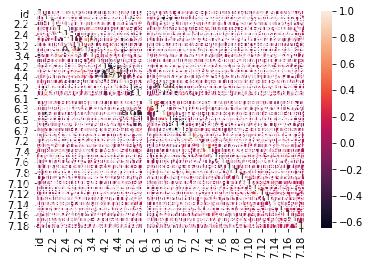

In [4]:
corrMatrix = dataset.corr()
sns.heatmap(corrMatrix, annot=True)
corrMatrix 

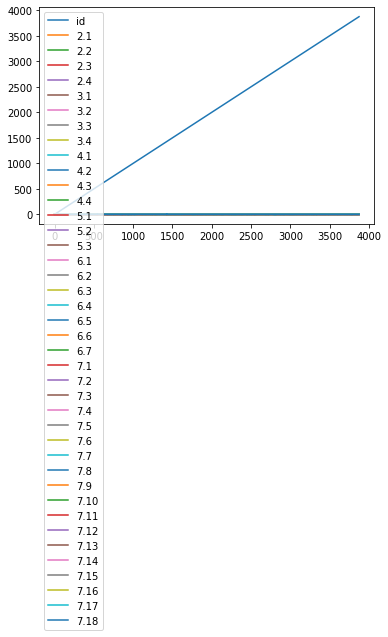

In [5]:
dataset.plot()


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


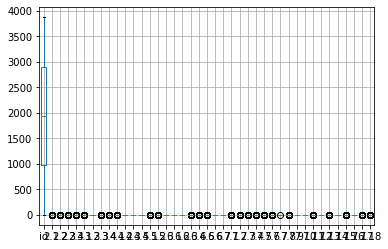

In [6]:
boxplot = dataset.boxplot()


# Prueba de hipótesis

Prueba de hipótesis en python

|       |  | Pruebas Paramétricas     | Pruebas No Paramétricas  |
| ----------- | ----------- | ----------- | ----------- |
| Muestras Independientes     | Múltiples muestras | Anova     |  Kruskal-Wallis|
|       | Dos Muestras| t de Student      | U Mann Whitney |
| Muestras Dependientes      | Múltiples muestras | ANOVA de dos vías      | Friedman |
|      | Dos Muestras | Prueba t dependiente      | Wilcoxson |



https://machinelearningmastery.com/statistical-hypothesis-tests-in-python-cheat-sheet/



*   Pruevas parametricas: Distibucion normal
*   Muestras dependinetes : Esta prueba se utiliza cuando las muestras son dependientes; esto es, cuando se trata de una única muestra que ha sido evaluada dos veces (muestras repetidas) o cuando las dos muestras han sido emparejadas o apareadas.






*   H0: La muestra sigue una distribución normal
*  H1:  La muestra no sigue una distribución normal



In [ ]:
from scipy import stats

In [7]:
pip install pycaret

     |████████████████████████████████| 266kB 5.8MB/s 
     |████████████████████████████████| 14.2MB 293kB/s 
     |████████████████████████████████| 215kB 43.2MB/s 
     |████████████████████████████████| 276kB 41.9MB/s 
     |████████████████████████████████| 6.8MB 29.5MB/s 
     |████████████████████████████████| 1.7MB 45.6MB/s 
     |████████████████████████████████| 61kB 7.8MB/s 
     |████████████████████████████████| 1.8MB 44.4MB/s 
     |████████████████████████████████| 102kB 11.8MB/s 
     |████████████████████████████████| 245kB 52.8MB/s 
     |████████████████████████████████| 1.1MB 47.7MB/s 
     |████████████████████████████████| 153kB 49.6MB/s 
     |████████████████████████████████| 163kB 54.4MB/s 
     |████████████████████████████████| 61kB 7.4MB/s 
     |████████████████████████████████| 81kB 9.1MB/s 
     |████████████████████████████████| 604kB 31.3MB/s 
     |████████████████████████████████| 3.1MB 44.8MB/s 
     |████████████████████████████████| 81kB 8.0MB/s 
 

In [1]:
from pycaret.clustering import *

In [5]:
exp_clu101 = setup(dataset, normalize = True, 
                   ignore_features = ['id'],
                   session_id = 123)

,Description,Value
0,session_id,123
1,Original Data,"(3876, 41)"
2,Missing Values,True
3,Numeric Features,0
4,Categorical Features,40
5,Ordinal Features,False
6,High Cardinality Features,False
7,High Cardinality Method,None
8,Transformed Data,"(3876, 112)"
9,CPU Jobs,-1


¿Qué es el algoritmo k-modes?
El algoritmo k-modes (Zhexue., 1998), fue diseñado para agrupar grandes conjuntos de datos categóricos, y tiene como objetivo obtener las k modas que representan al conjunto.


In [108]:
kmodes = create_model('kmodes', num_clusters=2)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.7697,5549.4481,0.5028,0,0,0


In [109]:
kmodes_results = assign_model(kmodes)
kmodes_results.head()

,2.3,2.4,3.1,5.1,Cluster
0,0.0,0.0,3,1.0,Cluster 0
1,0.0,0.0,5,0.0,Cluster 0
2,1.0,2.0,4,1.0,Cluster 1
3,0.0,0.0,5,0.0,Cluster 0
4,0.0,0.0,5,0.0,Cluster 0


In [9]:
plot_model(kmodes)

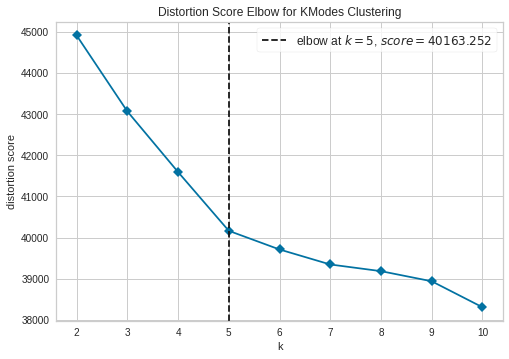

In [10]:
plot_model(kmodes, plot = 'elbow')

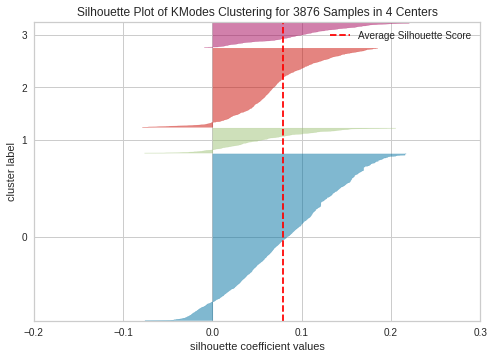

In [12]:
plot_model(kmodes, plot = 'silhouette')

In [15]:
from pycaret.classification import *
exp_mclf101 = setup(data = dataset, target = '2.3', session_id=123)

,Description,Value
0,session_id,123
1,Target,2.3
2,Target Type,Binary
3,Label Encoded,"0.0: 0, 1.0: 1"
4,Original Data,"(3876, 41)"
5,Missing Values,True
6,Numeric Features,1
7,Categorical Features,39
8,Ordinal Features,False
9,High Cardinality Features,False


In [16]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.311
dt,Decision Tree Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.025
svm,SVM - Linear Kernel,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.025
ridge,Ridge Classifier,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.025
rf,Random Forest Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.524
ada,Ada Boost Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.027
gbc,Gradient Boosting Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.284
et,Extra Trees Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.520
lightgbm,Light Gradient Boosting Machine,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.067
nb,Naive Bayes,0.9996,0.9980,0.9960,1.0000,0.9980,0.9978,0.9978,0.025


In [35]:
lr = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0
5,1.0,1.0,1.0,1.0,1.0,1.0,1.0
6,1.0,1.0,1.0,1.0,1.0,1.0,1.0
7,1.0,1.0,1.0,1.0,1.0,1.0,1.0
8,1.0,1.0,1.0,1.0,1.0,1.0,1.0
9,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [36]:
print(lr)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)


In [37]:

tuned_lr = tune_model(lr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0
5,1.0,1.0,1.0,1.0,1.0,1.0,1.0
6,1.0,1.0,1.0,1.0,1.0,1.0,1.0
7,1.0,1.0,1.0,1.0,1.0,1.0,1.0
8,1.0,1.0,1.0,1.0,1.0,1.0,1.0
9,1.0,1.0,1.0,1.0,1.0,1.0,1.0


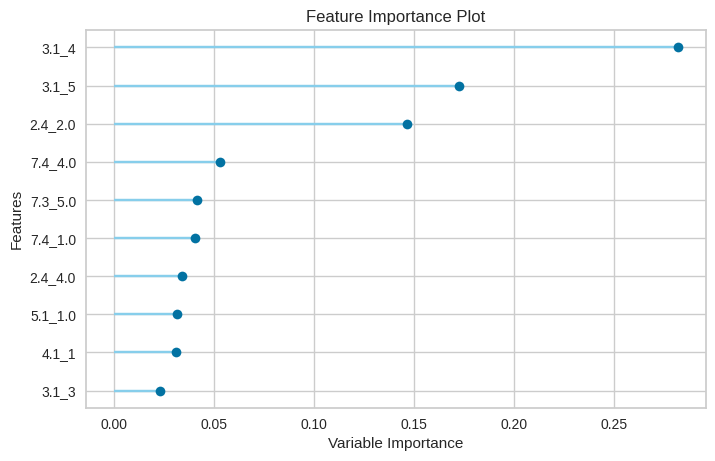

In [38]:
plot_model(tuned_lr, plot='feature')

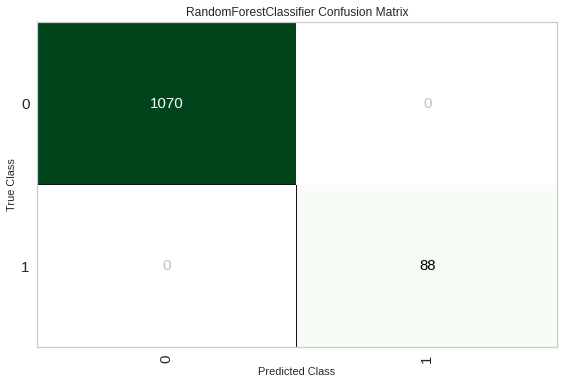

In [39]:
plot_model(tuned_lr, plot = 'confusion_matrix')

In [40]:
final_lr = finalize_model(tuned_lr)

In [41]:

predict_model(final_lr)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,2.1_2.0,2.1_4.0,2.1_5.0,2.1_6.0,2.1_not_available,2.2_2,2.4_1.0,2.4_2.0,2.4_3.0,2.4_4.0,3.1_3,3.1_4,3.1_5,3.1_6,3.1_8,3.2_0.0,3.2_not_available,3.3_1.0,3.4_1.0,3.4_2.0,3.4_3.0,3.4_4.0,3.4_not_available,4.1_1,4.2_1,4.3_0,4.4_0,5.1_1.0,5.3_1,6.1_2,6.2_1,6.4_0.0,6.4_1.0,6.4_not_available,6.5_1,6.6_0,6.7_0,7.1_1.0,7.1_2.0,7.1_3.0,...,7.2_5.0,7.2_6.0,7.2_7.0,7.2_not_available,7.3_1.0,7.3_2.0,7.3_3.0,7.3_4.0,7.3_5.0,7.4_1.0,7.4_2.0,7.4_3.0,7.4_4.0,7.4_5.0,7.4_not_available,7.5_1.0,7.6_2.0,7.7_1.0,7.7_2.0,7.7_3.0,7.7_4.0,7.7_5.0,7.7_6.0,7.7_7.0,7.7_not_available,7.8_2.0,7.9_1.0,7.10_2.0,7.11_1.0,7.12_1.0,7.13_1.0,7.14_2.0,7.15_2.0,7.16_1.0,7.17_1.0,7.17_2.0,7.18_1.0,2.3,Label,Score
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.8726
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.8395
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.8686
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.8632
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.8624
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1153,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.7939
1154,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.7847
1155,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.8568
1156,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.7974


In [33]:
pip install shap

     |████████████████████████████████| 358kB 4.0MB/s 
  Created wheel for shap: filename=shap-0.38.1-cp37-cp37m-linux_x86_64.whl size=490494 sha256=9306c0ad6e3451df299cd112bce7b756d8eef361bae7c9da5d262ee556e66cb5
  Stored in directory: /root/.cache/pip/wheels/a8/fb/e4/88012be41842b9be62ae18d82d1b1e880daf8539d1fef1fa00
Successfully built shap


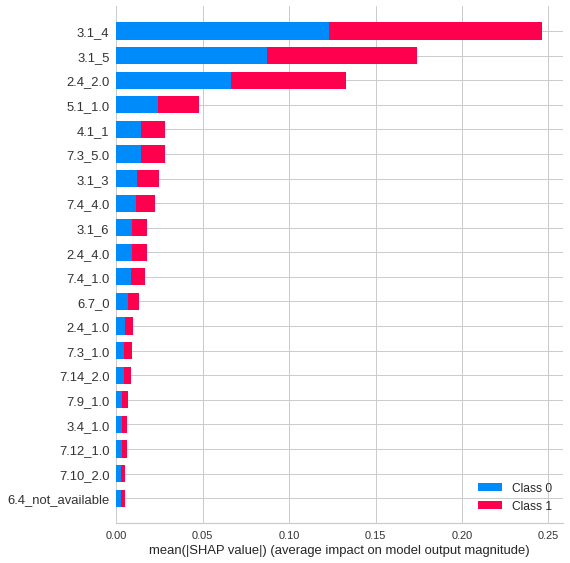

In [44]:
interpret_model(final_lr)

Pruebas paramétricas dos muestras independientes

In [45]:
interpret_model(final_lr, plot = 'reason', observation = 10)

In [74]:
a=dataset.head(1)

In [85]:
from sklearn.datasets import make_classification
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import shuffle
import numpy as np

X, Y = dataset, dataset

forest = RandomForestClassifier(n_estimators=10, random_state=1)
multi_target_forest = MultiOutputClassifier(forest, n_jobs=-1)
multi_target_forest.fit(X, Y).predict(X)

print(multi_target_forest.predict_proba(X))


[array([[0.7, 0. , 0. , ..., 0. , 0. , 0. ],
       [0.1, 0.4, 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0.5, ..., 0. , 0. , 0. ],
       ...,
       [0. , 0. , 0. , ..., 0.6, 0. , 0. ],
       [0. , 0. , 0. , ..., 0.1, 0.6, 0. ],
       [0. , 0. , 0. , ..., 0.1, 0. , 0.5]]), array([[0. , 0. , 0.9, ..., 0. , 0. , 0. ],
       [0. , 0. , 0.8, ..., 0. , 0. , 0. ],
       [0. , 0. , 0.5, ..., 0. , 0. , 0. ],
       ...,
       [0. , 1. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 1. , ..., 0. , 0. , 0. ],
       [0.1, 0. , 0.9, ..., 0. , 0. , 0. ]]), array([[1. , 0. ],
       [0.9, 0.1],
       [1. , 0. ],
       ...,
       [0.2, 0.8],
       [1. , 0. ],
       [1. , 0. ]]), array([[1., 0.],
       [1., 0.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [0., 1.]]), array([[1. , 0. , 0. , 0. , 0. ],
       [1. , 0. , 0. , 0. , 0. ],
       [0. , 0.3, 0.7, 0. , 0. ],
       ...,
       [1. , 0. , 0. , 0. , 0. ],
       [1. , 0. , 0. , 0. , 0. ],
       [0. , 0. ,

In [89]:
sel=dataset.loc[:,['2.3','2.4','3.1','5.1']]

In [90]:
sel.head()

,2.3,2.4,3.1,5.1
0,0.0,0.0,3,1.0
1,0.0,0.0,5,0.0
2,1.0,2.0,4,1.0
3,0.0,0.0,5,0.0
4,0.0,0.0,5,0.0


,2.3,2.4,3.1,5.1
2.3,1.000000,0.930634,-0.298590,0.231578
2.4,0.930634,1.000000,-0.277878,0.213537
3.1,-0.298590,-0.277878,1.000000,-0.249021
5.1,0.231578,0.213537,-0.249021,1.000000


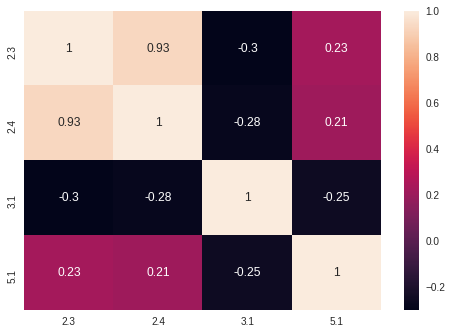

In [91]:
corrMatrix = sel.corr()
sns.heatmap(corrMatrix, annot=True)
corrMatrix 

In [94]:
exp_mclf234 = setup(data = sel, target = '2.3', session_id=234)

,Description,Value
0,session_id,234
1,Target,2.3
2,Target Type,Binary
3,Label Encoded,"0.0: 0, 1.0: 1"
4,Original Data,"(3876, 4)"
5,Missing Values,False
6,Numeric Features,1
7,Categorical Features,2
8,Ordinal Features,False
9,High Cardinality Features,False


In [95]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,1.0000,1.0,1.0000,1.0,1.0000,1.0000,1.0000,0.030
knn,K Neighbors Classifier,1.0000,1.0,1.0000,1.0,1.0000,1.0000,1.0000,0.128
nb,Naive Bayes,1.0000,1.0,1.0000,1.0,1.0000,1.0000,1.0000,0.021
dt,Decision Tree Classifier,1.0000,1.0,1.0000,1.0,1.0000,1.0000,1.0000,0.021
svm,SVM - Linear Kernel,1.0000,0.0,1.0000,1.0,1.0000,1.0000,1.0000,0.022
ridge,Ridge Classifier,1.0000,0.0,1.0000,1.0,1.0000,1.0000,1.0000,0.022
rf,Random Forest Classifier,1.0000,1.0,1.0000,1.0,1.0000,1.0000,1.0000,0.483
ada,Ada Boost Classifier,1.0000,1.0,1.0000,1.0,1.0000,1.0000,1.0000,0.024
gbc,Gradient Boosting Classifier,1.0000,1.0,1.0000,1.0,1.0000,1.0000,1.0000,0.105
et,Extra Trees Classifier,1.0000,1.0,1.0000,1.0,1.0000,1.0000,1.0000,0.466


In [107]:
from pycaret.clustering import *
exp_clu321 = setup(sel, normalize = True,session_id = 321)
kmodes = create_model('kmodes',num_clusters=2)
kmodes_results = assign_model(kmodes)
kmodes_results.head()
plot_model(kmodes)


In [106]:
kmodes_results.head(10)

,2.3,2.4,3.1,5.1,Cluster
0,0.0,0.0,3,1.0,Cluster 2
1,0.0,0.0,5,0.0,Cluster 0
2,1.0,2.0,4,1.0,Cluster 1
3,0.0,0.0,5,0.0,Cluster 0
4,0.0,0.0,5,0.0,Cluster 0
5,0.0,0.0,5,0.0,Cluster 0
6,1.0,2.0,4,0.0,Cluster 1
7,0.0,0.0,3,1.0,Cluster 2
8,0.0,0.0,5,0.0,Cluster 0
9,0.0,0.0,5,0.0,Cluster 0
